# Walmart-Confidence Interval and CLT #

### Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide ###

## Business Problem ##

#### The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female) ####

## 1. Problem Statement and Analyzing basic metrics ##

#### The management team at Walmart Inc. seeks to analyze customer purchase behavior, particularly focusing on purchase amounts in relation to customer gender and various other factors #### 

#### The objective is to facilitate informed decision-making within the business. Specifically, the team aims to investigate potential differences in spending habits between male and female customers, particularly on Black Friday. With a customer base consisting of 50 million males and 50 million females, the team aims to ascertain whether women exhibit higher spending on Black Friday compared to men ####


#### Basic Metrics ####  
#### By analyzing these basic metrics, the management team at Walmart Inc. can gain valuable insights into customer spending habits and make data-driven decisions to optimize business outcomes ####
#### 1. The dataset will be analysed to interpret the total purchase amount, average purchase amount, and purchase frequency for both male and female customers ####
#### 2. Interpret the total spending and average spending on Black Friday for both genders ####
#### 3. Analyse the spending metrics between male and female customers to identify any significant differences ####
#### 4. Use statistical tests (e.g., t-test, chi-square test) to determine if the observed differences are statistically significant.

#### DATA DESCRIPTION: The data consists of the following attributes: #### 
##### User_ID: User ID
##### Product_ID: Product ID
##### Gender: Sex of User
##### Age: Age in bins
##### Occupation: Occupation(Masked)
##### City_Category: Category of the City (A,B,C)
##### StayInCurrentCityYears: Number of years stay in current city
##### Marital_Status: Marital Status
##### ProductCategory: Product Category (Masked)
##### Purchase: Purchase Amount

## 2. Basic EDA(Observations on Data) ##

In [1]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import norm
import warnings

In [2]:
# Load Walmart data present in CSV file
data=pd.read_csv("walmart_data.csv")

#### Shape of the Data #####

In [3]:
# Shape of data to check the number of rows and columns
data.shape

(550068, 10)

In [4]:
# To get the column names
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

#### Data types of all the attributes

In [5]:
#check the datatype of each variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [6]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [7]:
# Convert all columns (except Purchase) to categorical type in the DataFrame

for _ in data.columns[:-1]:
 data[_] = data[_].astype('category')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  category
 1   Product_ID                  550068 non-null  category
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  category
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  category
 9   Purchase                    550068 non-null  int64   
dtypes: category(9), int64(1)
memory usage: 10.3 MB


In [8]:
# number of missing values in each column
data.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [9]:
print(data.isnull().any())

User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category              False
Purchase                      False
dtype: bool


#### Insights #####
##### There are no null values in the given dataset,it indicates that all the required data points are present and there are no missing values.  #####

##### Statistical summary #####

In [10]:
data.describe()

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


#### Insights #####
##### Purchase amount might have outliers.  #####

## 3.  Non-Graphical Analysis - Data Preprocessing 

#### Non-Graphical Analysis involves examining the characteristics and distributions of variables, identifying patterns, and extracting insights from the data

In [11]:
#number of unique values in our data
for i in data.columns:
  print(i,':',data[i].nunique())
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

User_ID : 5891
Product_ID : 3631
Gender : 2
Age : 7
Occupation : 21
City_Category : 3
Stay_In_Current_City_Years : 5
Marital_Status : 2
Product_Category : 20
Purchase : 18105


In [12]:
# Non-graphical analysis using value counts and unique attributes
non_graphical_analysis = {}
# Value counts for columns with missing values
columns_with_missing_values = data.columns[data.isnull().any()]
for col in columns_with_missing_values:
 non_graphical_analysis[col] = data[col].value_counts(dropna=False)
# Unique attributes for all columns
for col in data.columns:
 non_graphical_analysis[f'{col}_unique'] = data[col].unique()
# Print non-graphical analysis results
for key, value in non_graphical_analysis.items():
 print(f"{key}:\n{value}\n")


User_ID_unique:
[1000001, 1000002, 1000003, 1000004, 1000005, ..., 1004588, 1004871, 1004113, 1005391, 1001529]
Length: 5891
Categories (5891, int64): [1000001, 1000002, 1000003, 1000004, ..., 1006037, 1006038, 1006039, 1006040]

Product_ID_unique:
['P00069042', 'P00248942', 'P00087842', 'P00085442', 'P00285442', ..., 'P00375436', 'P00372445', 'P00370293', 'P00371644', 'P00370853']
Length: 3631
Categories (3631, object): ['P00000142', 'P00000242', 'P00000342', 'P00000442', ..., 'P0099642', 'P0099742', 'P0099842', 'P0099942']

Gender_unique:
['F', 'M']
Categories (2, object): ['F', 'M']

Age_unique:
['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']
Categories (7, object): ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

Occupation_unique:
[10, 16, 15, 7, 20, ..., 18, 5, 14, 13, 6]
Length: 21
Categories (21, int64): [0, 1, 2, 3, ..., 17, 18, 19, 20]

City_Category_unique:
['A', 'C', 'B']
Categories (3, object): ['A', 'B', 'C']

Stay_In_Current_City_Years_unique:
[

In [13]:
categorical_cols = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']
data[categorical_cols].melt().groupby(['variable', 'value'])[['value']].count()/len(data)

value
variable                   value          
Age                        0-17   0.027455
                           18-25  0.181178
                           26-35  0.399200
                           36-45  0.199999
                           46-50  0.083082
                           51-55  0.069993
                           55+    0.039093
City_Category              A      0.268549
                           B      0.420263
                           C      0.311189
Gender                     F      0.246895
                           M      0.753105
Marital_Status             0      0.590347
                           1      0.409653
Occupation                 0      0.126599
                           1      0.086218
                           2      0.048336
                           3      0.032087
                           4      0.131453
                           5      0.022137
                           6      0.037005
                           7      0.107501
                           8      0.002811
                           9      0.011437
                           10     0.023506
                           11     0.021063
                           12     0.056682
                           13     0.014049
                           14     0.049647
                           15     0.022115
                           16     0.046123
                           17     0.072796
                           18     0.012039
                           19     0.015382
                           20     0.061014
Product_Category           1      0.255201
                           2      0.043384
                           3      0.036746
                           4      0.021366
                           5      0.274390
                           6      0.037206
                           7      0.006765
                           8      0.207111
                           9      0.000745
                           10     0.009317
                           11     0.044153
                           12     0.007175
                           13     0.010088
                           14     0.002769
                           15     0.011435
                           16     0.017867
                           17     0.001051
                           18     0.005681
                           19     0.002914
                           20     0.004636
Stay_In_Current_City_Years 0      0.135252
                           1      0.352358
                           2      0.185137
                           3      0.173224
                           4+     0.154028

#### Insights #### 
##### 80% of the users are between the age 18-50 (40%: 26-35, 18%: 18-25, 20%: 36-45) #####
##### 75% of the users are Male and 25% are Female #####
##### 60% Single, 40%  #####
##### 35% Staying in the city from 1 year, 18% from 2 years, 17% from 3 years #####
##### Total of 20 product categories are there ##### 
##### There are 20 differnent types of occupations in the city #####

In [14]:
# Map numerical values in 'Marital_Status' to categorical labels\

data['Marital_Status'] = data['Marital_Status'].apply(lambda x: 'Married' if x == 1 else 'Single')


## 4. Visual Analysis - Univariate, Bivariate after pre processing of the data

#### Univariate analysis involves examining the distribution and characteristics of a single variable in isolation.Following data pre-processing, univariateanalysis facilitates a visual understanding of the distinct properties and behaviors of individual variables.


### Univariate Analysis - Distribution of Purchase : HistPlot 

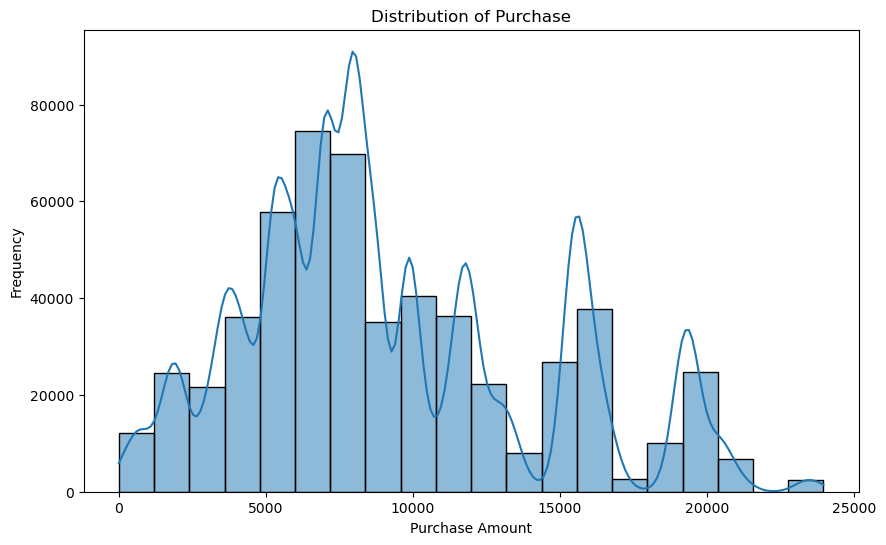

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Purchase'], bins=20, kde=True)
plt.title('Distribution of Purchase')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.show()

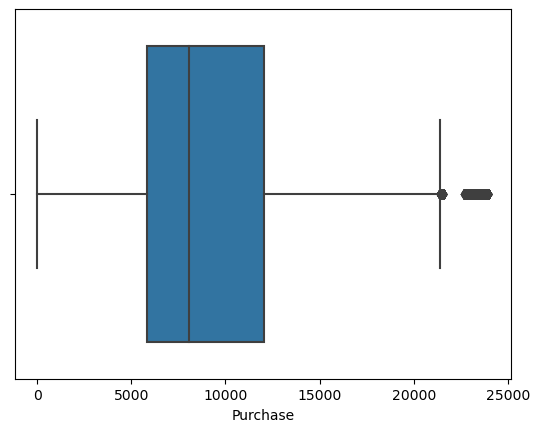

In [16]:
sns.boxplot(data=data, x='Purchase', orient='h')
plt.show()

#### Insights #####
##### There are outliers below 5th percentile and above  95 percentiles have extreme values,  so we have to brought extreme values (outliers) within a specified range, which can be useful for data analysis and visualization, especially when extreme values might skew the interpretation of results.  

In [17]:
# Calculate quartiles and IQR for the specified column
Q1 = np.percentile(data['Purchase'], 25)
Q3 = np.percentile(data['Purchase'], 75)
IQR = Q3 - Q1

# Upper and lower bounds for outliers
upper_bound = Q3 + (1.5 * IQR)
lower_bound = Q1 - (1.5 * IQR)

# Outliers in the specified column
upper_outliers_df = data[data['Purchase'] > upper_bound]
lower_outliers_df = data[data['Purchase'] < lower_bound]

# Count of outliers
upper_count = len(upper_outliers_df)
lower_count = len(lower_outliers_df)

total_count = upper_count + lower_count

In [18]:
print(f"Upper Outliers Count: {upper_count}")
print(f"Lower Outliers Count: {lower_count}")
print(f"Overall Outliers Count: {total_count}")

Upper Outliers Count: 2677
Lower Outliers Count: 0
Overall Outliers Count: 2677


In [19]:
# Extract rows where 'Purchase' values are greater than the upper bound to identify outliers

outliers_df = data[data['Purchase'] > upper_bound]
outliers_df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
343,1000058,P00117642,M,26-35,2,B,3,Single,10,23603
375,1000062,P00119342,F,36-45,3,A,1,Single,10,23792
652,1000126,P00087042,M,18-25,9,B,1,Single,10,23233
736,1000139,P00159542,F,26-35,20,C,2,Single,10,23595
1041,1000175,P00052842,F,26-35,2,B,1,Single,10,23341
...,...,...,...,...,...,...,...,...,...,...
544488,1005815,P00116142,M,26-35,20,B,1,Single,10,23753
544704,1005847,P00085342,F,18-25,4,B,2,Single,10,23724
544743,1005852,P00202242,F,26-35,1,A,0,Married,10,23529
545663,1006002,P00116142,M,51-55,0,C,1,Married,10,23663


In [20]:
clipped_data = np.clip(data['Purchase'], lower_bound, upper_bound)

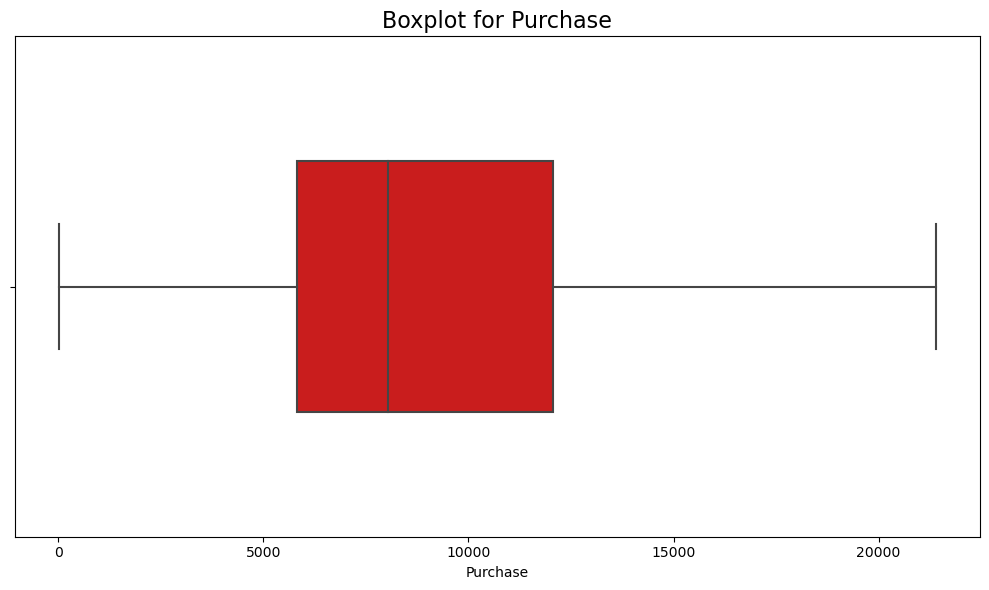

In [21]:
plt.figure(figsize=(10, 6))

# Create a box plot for clipped data
sns.boxplot(x=clipped_data,color='#e60000', width=0.5, orient='h')
plt.title('Boxplot for Purchase', fontsize=16)
plt.tight_layout()
plt.show()

In [55]:
category = ['Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']

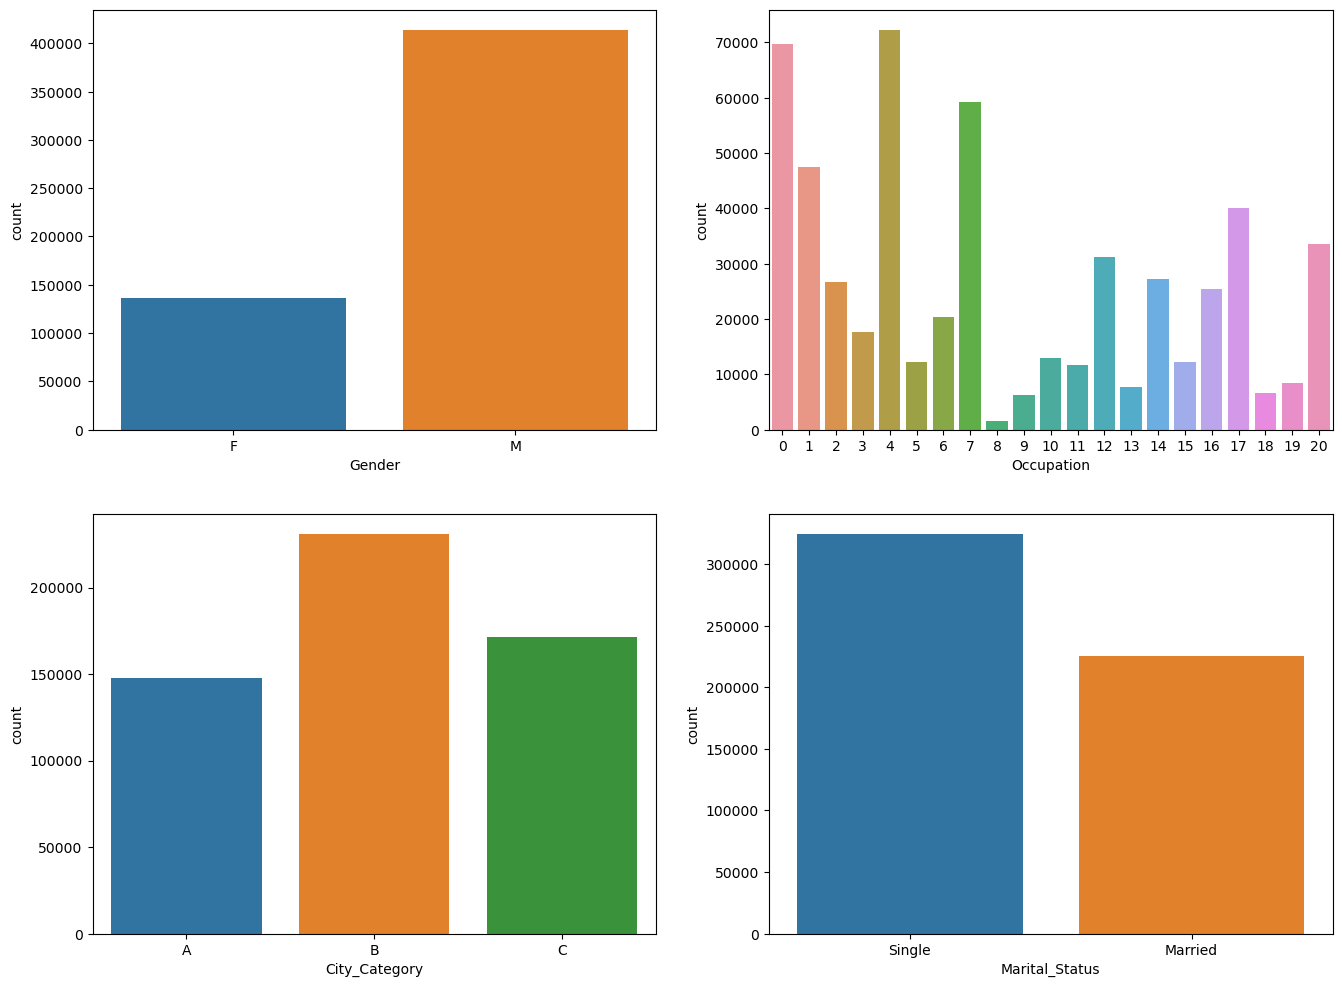

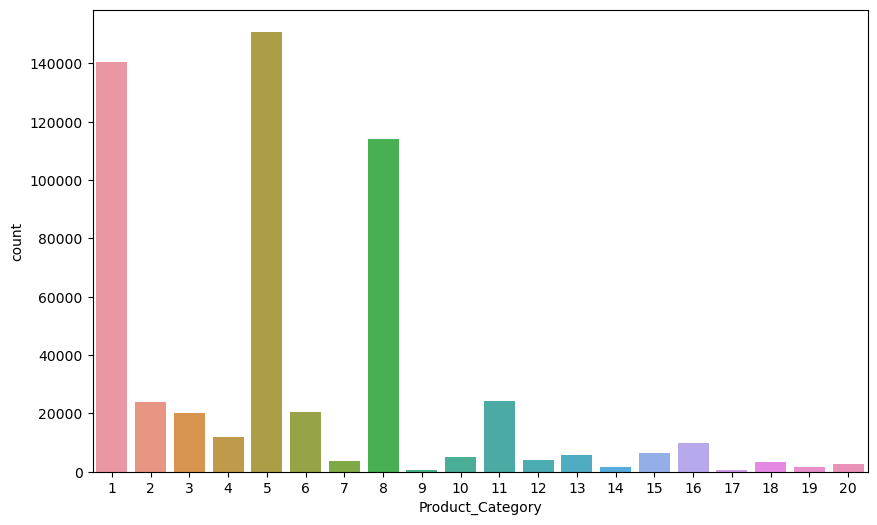

In [23]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
sns.countplot(data=data, x='Gender', ax=axs[0,0])
sns.countplot(data=data, x='Occupation', ax=axs[0,1])
sns.countplot(data=data, x='City_Category', ax=axs[1,0])
sns.countplot(data=data, x='Marital_Status', ax=axs[1,1])
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Product_Category')
plt.show()

#### Insights #### 
##### Most of the users are Male #####
##### There are 20 different types of Occupation and Product_Category #####
##### More users belong to B City_Category  #####
##### More users are Single as compare to Marrieds #####
##### Product_Category - 1, 5, 8, & 11 have highest purchasing frequency. ##### 

###  Bivariate Analysis ###

In [24]:
pivot = lambda index: data.pivot_table(index=data[index], columns='Gender', aggfunc='size', fill_value=0)

In [25]:
pivot('Age')

Gender,F,M
Age,,
0-17,5083,10019
18-25,24628,75032
26-35,50752,168835
36-45,27170,82843
46-50,13199,32502
51-55,9894,28607
55+,5083,16421


In [26]:
pivot('Occupation')

Gender,F,M
Occupation,,
0,18112,51526
1,17984,29442
2,8629,17959
3,7919,9731
4,17836,54472
5,2220,9957
6,8160,12195
7,10028,49105
8,361,1185


In [27]:
pivot('City_Category')

Gender,F,M
City_Category,,
A,35704,112016
B,57796,173377
C,42309,128866


In [28]:
pivot('Stay_In_Current_City_Years')

Gender,F,M
Stay_In_Current_City_Years,,
0,17063,57335
1,51298,142523
2,24332,77506
3,24520,70765
4+,18596,66130


In [29]:
pivot('Marital_Status')

Gender,F,M
Marital_Status,,
Single,78821,245910
Married,56988,168349


In [31]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [32]:
pivot('Product_Category')

Gender,F,M
Product_Category,,
1,24831,115547
2,5658,18206
3,6006,14207
4,3639,8114
5,41961,108972
6,4559,15907
7,943,2778
8,33558,80367
9,70,340


In [33]:
category = ['Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']

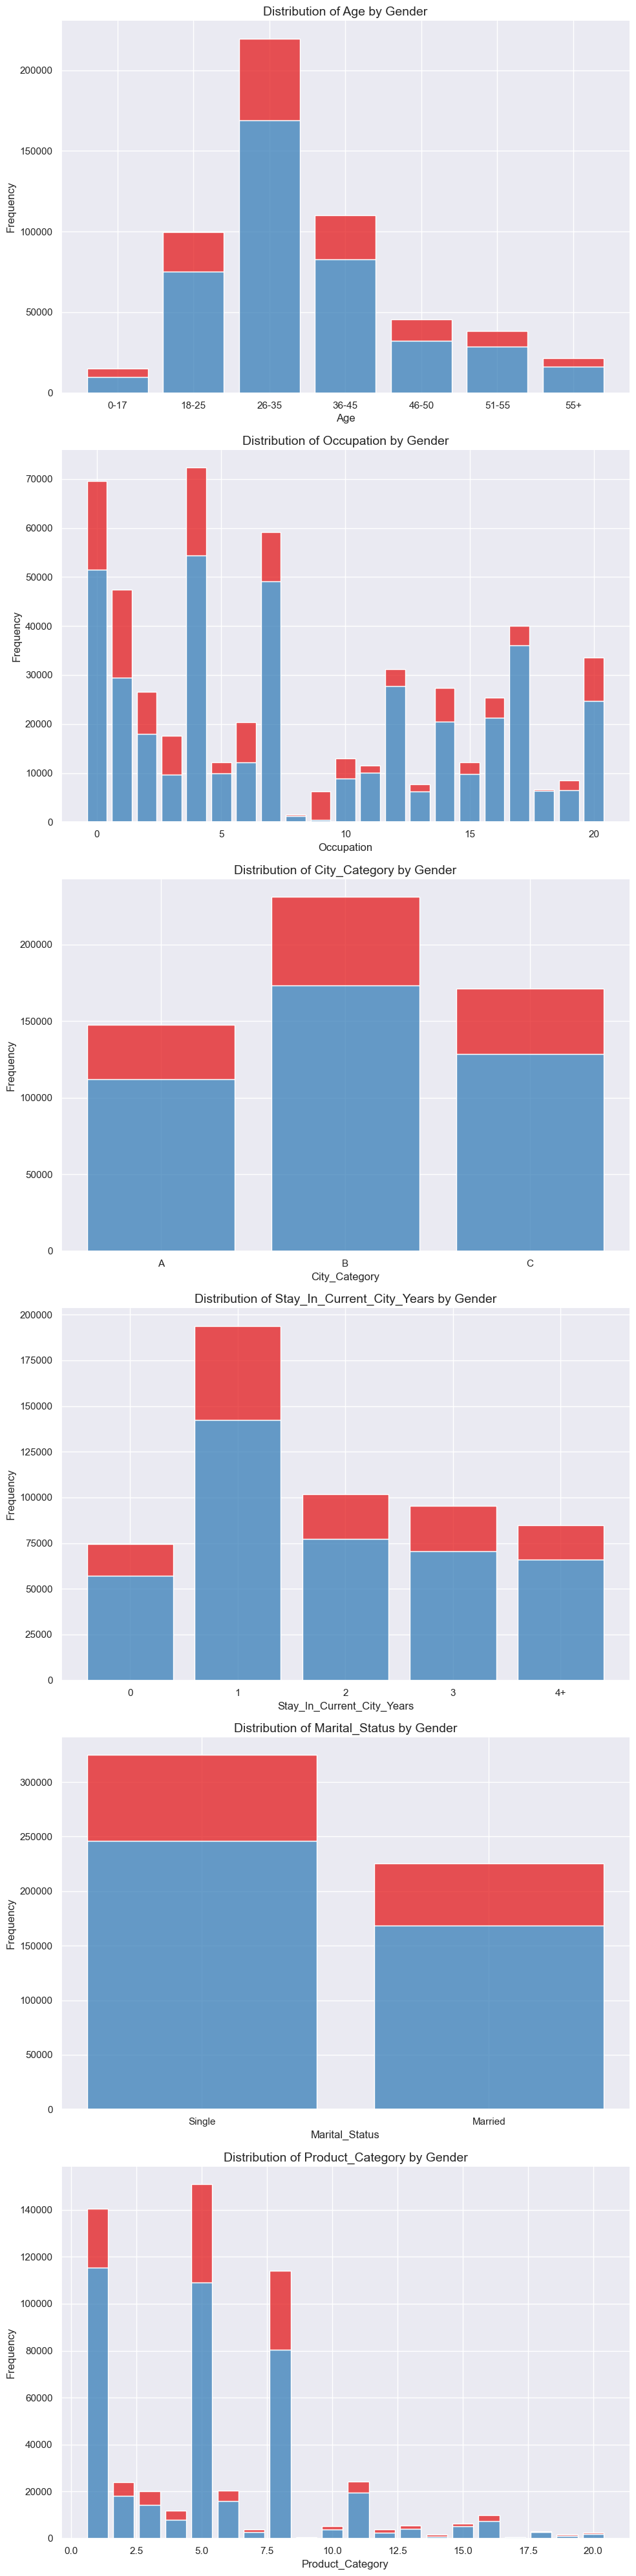

In [34]:
plt.figure(figsize=(10, 40))
sns.set(style='darkgrid')

# Plot each categorical column
for i, col in enumerate(category, 1):
    plt.subplot(6, 1, i)
    sns.histplot(data=data, x=col, hue='Gender', palette='Set1', legend=False, multiple='stack', shrink=0.8)
    sns.despine()
    
    # Set labels and title
    plt.xlabel(f'{col}', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.title(f'Distribution of {col} by Gender', fontsize=14, fontfamily='sans-serif')

    plt.tight_layout()

plt.show()

#### Insights 
##### 1. Gender-Related Purchase Analysis:
##### Across various age groups, males tend to have higher purchase counts compared to females, with the age group '26-35' showing the most significant difference.

##### 2. Occupation-Related Purchase Analysis:
##### Occupations '0' and '4' show the highest purchase counts, suggesting that individuals in these occupations contribute significantly to overall sales, with '4' having notably higher purchases than others.

##### 3. City Category-Related Purchase Analysis:
##### City_Category 'B' has the highest purchase counts for both genders, indicating that customers residing in City_Category 'B' contribute significantly to overall sales compared to 'A' and 'C'.

##### 4.Stay in Current City Duration Impact:
##### Customers who have stayed in their current city for 1 year exhibit the highest purchase counts, suggesting that individuals with a 1-year residence duration have a higher tendency to make purchases compared to other durations.

##### 5. Marital Status-Related Purchase Analysis:
##### Individuals with a marital status of 'Single' have higher purchase counts compared to those who are 'Married', indicating that single individuals contribute more to overall sales.

##### 6.Product Category-Related Purchase Analysis:
##### Product Category '1' has the highest purchase counts, indicating that it significantly contributes to overall sales. Product Categories '5' and '8' also show notable purchase counts.

### Multivariate Analysis ###

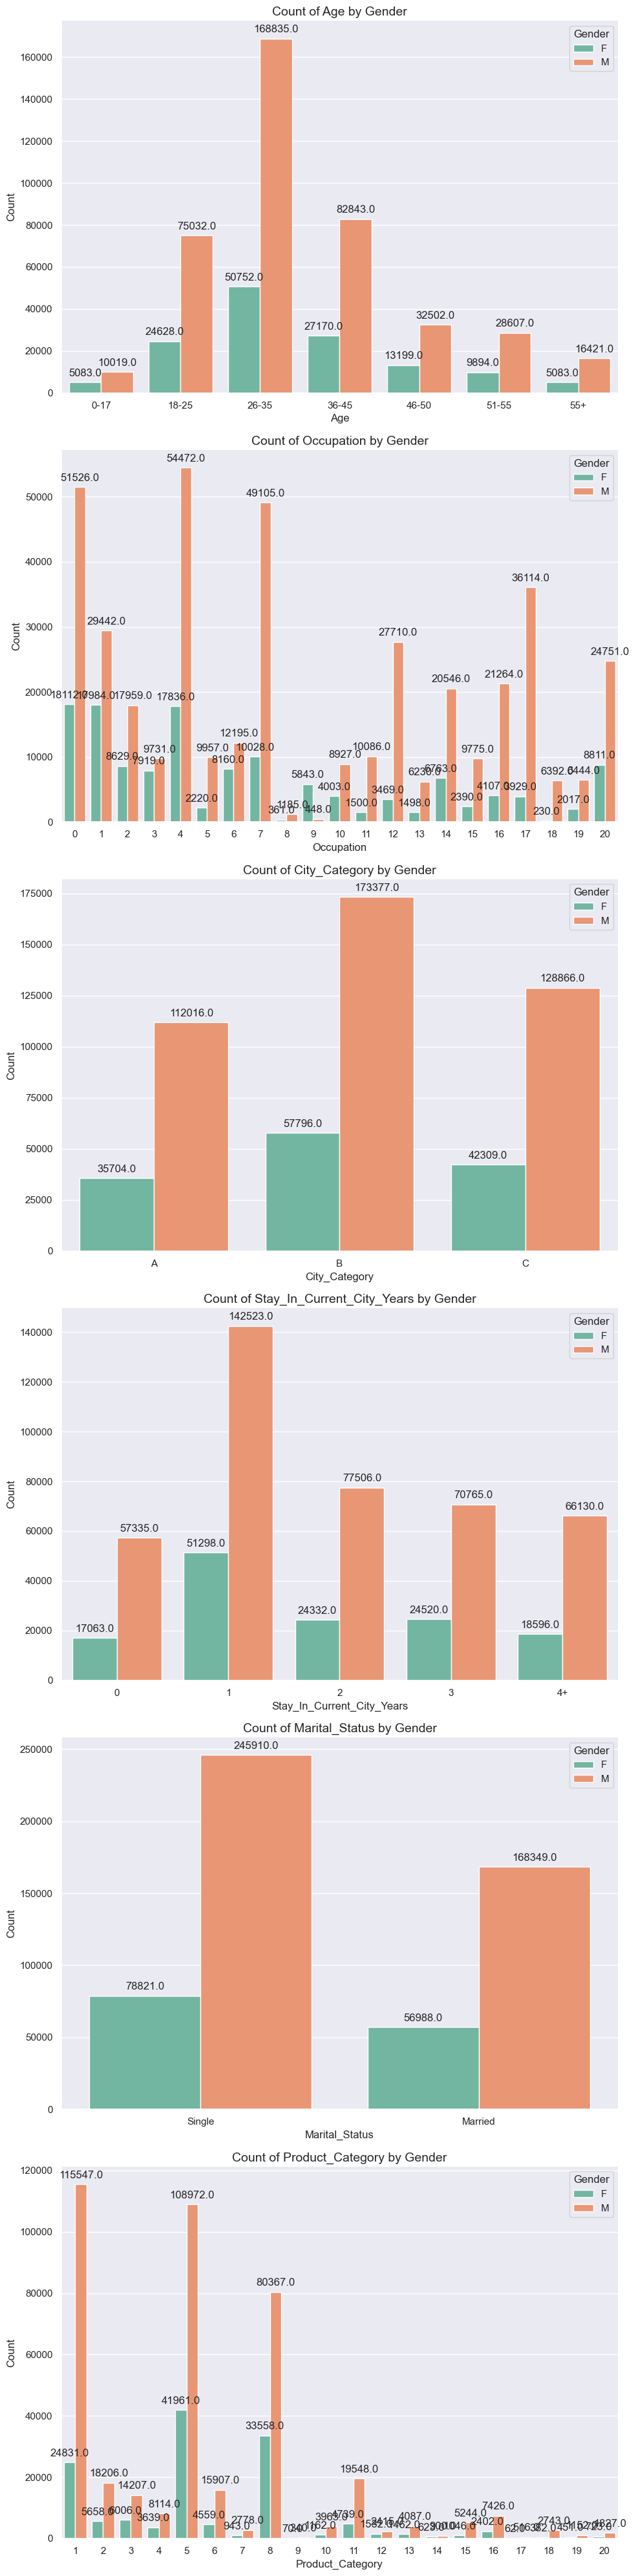

In [35]:
plt.figure(figsize=(10, 40))
sns.set(style='darkgrid')

# Plot each categorical column
for i, col in enumerate(category, 1):
    plt.subplot(6, 1, i)
    ax = sns.countplot(data=data, x=col, hue='Gender', palette='Set2')
    sns.despine()

    plt.title(f'Count of {col} by Gender', fontsize=14, fontfamily='sans-serif')
    plt.xlabel(col)
    plt.ylabel('Count')  

    # Add bar counts as text labels
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}',
                    (p.get_x() + p.get_width() / 2.,
                     p.get_height()),
                    ha='center',
                    va='center',
                    xytext=(0, 10),
                    textcoords='offset points')

    plt.tight_layout()

plt.show()

### 4. Balck friday Sales analysis on gender ###

In [36]:
avg_purchase = data.groupby('Gender')[['Purchase']].mean().reset_index().round(2)
avg_purchase

,Gender,Purchase
0,F,8734.57
1,M,9437.53


In [37]:
df_male = data[data['Gender']=='M']
df_female = data[data['Gender']=='F']

In [38]:
print(f'Male customers - {len(df_male)}')
print(f'Female customers - {len(df_female)}')

Male customers - 414259
Female customers - 135809


In [40]:
data.groupby('Gender')['Purchase'].describe().T

Gender,F,M
count,135809.000000,414259.00000
mean,8734.565765,9437.52604
std,4767.233289,5092.18621
min,12.000000,12.00000
25%,5433.000000,5863.00000
50%,7914.000000,8098.00000
75%,11400.000000,12454.00000
max,23959.000000,23961.00000


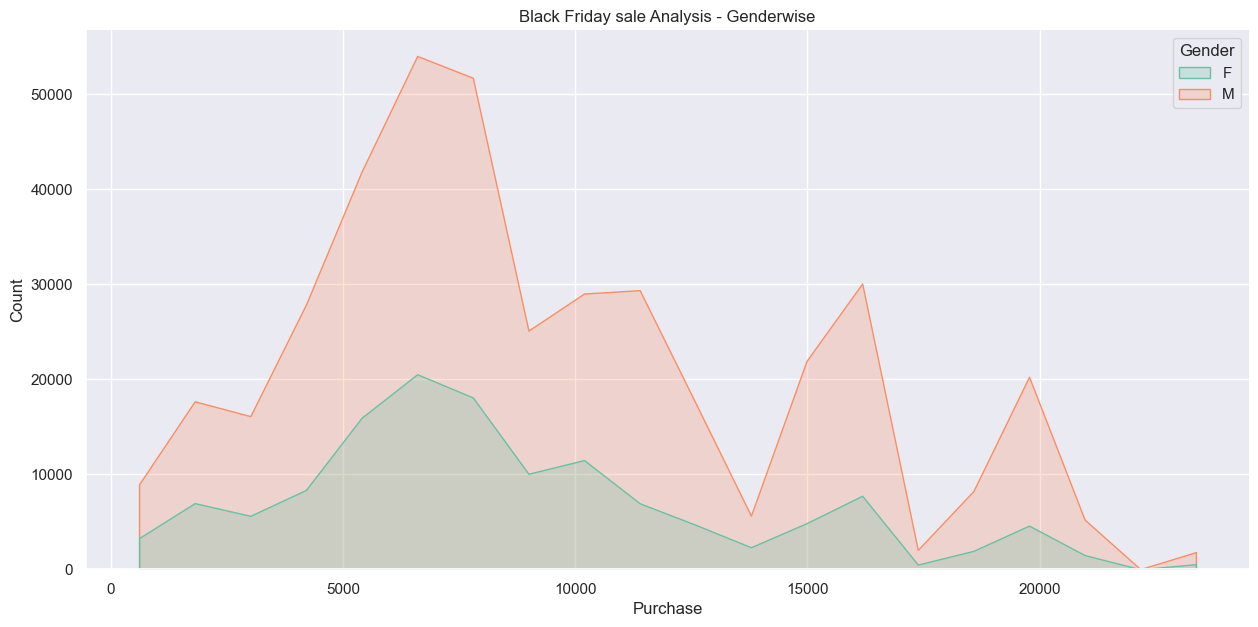

In [41]:
plt.figure(figsize=(15,7))
sns.set(style='darkgrid')
sns.histplot(data=data, x = "Purchase", bins=20, hue = "Gender",element='poly',palette= 'Set2')
sns.despine()
plt.title('Black Friday sale Analysis - Genderwise')
plt.show()

### Insights ###
##### Men spent more money than women during the Black Friday sale.

##### The total number of male customers (4225) exceeds the total number of female customers (1666).

##### The average amount spent by male customers (9437) is higher than the average amount spent by female customers (8734).

##### With a larger male customer base, it is likely that men will make more purchases compared to females.

##### The higher sales among male customers could be attributed to a product range better suited to their preferences, leading to increased sales of products targeted towards men.

In [42]:
# Calculates the 95% confidence interval and width for a specified category within a given variable in the dataset.

def data_ci(data, variable, category, confidence_level=0.95):

    category_data = data[data[variable] == category]['Purchase']
    category_mean = category_data.mean()
    category_std = category_data.std()

    # standard error of the mean
    category_sem = category_std / np.sqrt(len(category_data))

    # margin of error
    category_moe = category_sem * norm.ppf((1 + confidence_level) / 2)

    # confidence interval
    category_ci = (category_mean - category_moe, category_mean + category_moe)

    # width
    category_width = category_ci[1] - category_ci[0]

    print(f'{category} 95% confidence interval: {category_ci}')
    print(f'{category} Width: {category_width}')

In [43]:
# Calculates the 95% confidence interval and width for a specified category within a given variable in a sampled dataset.

def sample_ci(data, variable, category, sample_size):
    
    category_data = data[data[variable] == category]['Purchase']
    sample_data = category_data.sample(n=sample_size, random_state=42)
    mean_val = sample_data.mean()
    std_dev = sample_data.std()

    # standard error of the mean
    sem = std_dev / np.sqrt(sample_size)

    # margin of error
    moe = sem * norm.ppf((1 + 0.95) / 2)  # 1.96 corresponds to the Z-score for a 95% confidence interval

    # confidence interval
    ci = (mean_val - moe, mean_val + moe)
    
    category_width = ci[1] - ci[0]

    print(f"\nSample Size: {sample_size}")
    print(f'{category} 95% confidence interval: {ci}')
    print(f'{category} Width: {category_width}')

### 5. Confidence intervals for the Average amount spent per gender ###

#### 95% confidence interval of Entire Dataset ####

In [44]:
data_ci(data, 'Gender', 'M')

M 95% confidence interval: (9422.01944736257, 9453.032633581959)
M Width: 31.013186219388444


In [45]:
data_ci(data, 'Gender', 'F')

F 95% confidence interval: (8709.21154714068, 8759.919983170272)
F Width: 50.70843602959212


#### 95% confidence interval of 300 samples ####

In [46]:
sample_ci(data, 'Gender', 'M', 300)


Sample Size: 300
M 95% confidence interval: (9283.731565877591, 10491.715100789075)
M Width: 1207.9835349114837


In [47]:
sample_ci(data, 'Gender', 'F', 300)


Sample Size: 300
F 95% confidence interval: (8308.865304074718, 9426.034695925284)
F Width: 1117.1693918505662


#### 95% confidence interval of 3000 samples #### 

In [49]:
sample_ci(data, 'Gender', 'M', 3000)


Sample Size: 3000
M 95% confidence interval: (9460.10182838994, 9831.170171610062)
M Width: 371.0683432201222


In [50]:
sample_ci(data, 'Gender', 'F', 3000)


Sample Size: 3000
F 95% confidence interval: (8630.481387808419, 8982.545945524913)
F Width: 352.06455771649416


#### 95% confidence interval of 30000 samples ####

In [51]:
sample_ci(data, 'Gender', 'M', 30000)


Sample Size: 30000
M 95% confidence interval: (9428.950211018666, 9544.881322314668)
M Width: 115.9311112960022


In [52]:
sample_ci(data, 'Gender', 'F', 30000)


Sample Size: 30000
F 95% confidence interval: (8602.340431075772, 8709.62250225756)
F Width: 107.28207118178761


#### Insights: ####
##### The confidence interval computed using the entire dataset is wider for males compared to females, indicating higher variability in the amount spent by males.

#### The width of the confidence interval is inversely affected by the sample size; as the sample size increases, the interval becomes narrower, providing more precise estimates.

#### The confidence intervals for different sample sizes overlap, suggesting that observed differences may not be statistically significant.

#### Larger sample sizes result in more normally shaped distributions of means due to the Central Limit Theorem.

### Confidence intervals for the average amount spent per Marital_Status ### 

#### 95% confidence interval of Entire Dataset ####

In [54]:
data_ci(data, 'Marital_Status', 'Married')

Married 95% confidence interval: (9240.460427057078, 9281.888721107669)
Married Width: 41.42829405059092


In [55]:
data_ci(data, 'Marital_Status', 'Single')

Single 95% confidence interval: (9248.61641818668, 9283.198819656332)
Single Width: 34.58240146965181


### 95% confidence interval of 300 samples

In [57]:
sample_ci(data, 'Marital_Status', 'Married', 300)


Sample Size: 300
Married 95% confidence interval: (8887.305881933493, 10041.72745139984)
Married Width: 1154.4215694663471


In [58]:
sample_ci(data, 'Marital_Status', 'Single', 300)


Sample Size: 300
Single 95% confidence interval: (9051.928693931213, 10213.504639402121)
Single Width: 1161.5759454709078


#### 95% confidence interval of 3000 samples

In [59]:
sample_ci(data, 'Marital_Status', 'Married', 3000)


Sample Size: 3000
Married 95% confidence interval: (9118.562018709765, 9482.974647956902)
Married Width: 364.4126292471374


In [60]:
sample_ci(data, 'Marital_Status', 'Single', 3000)


Sample Size: 3000
Single 95% confidence interval: (9246.175079645862, 9612.375587020804)
Single Width: 366.2005073749424


#### 95% confidence interval of 30000 samples

In [61]:
sample_ci(data, 'Marital_Status', 'Married', 30000)


Sample Size: 30000
Married 95% confidence interval: (9198.15616601518, 9312.029900651485)
Married Width: 113.87373463630502


In [62]:
sample_ci(data, 'Marital_Status', 'Single', 30000)


Sample Size: 30000
Single 95% confidence interval: (9229.816006946752, 9343.573126386582)
Single Width: 113.7571194398297


#### Insights: ####
##### The confidence interval for the 'Married' group is wider than that for the 'Single' group, indicating higher variability in the amount spent for married individuals.

##### The width of the confidence interval decreases as the sample size increases, showcasing the impact of larger sample sizes on precision.

##### Yes, the confidence intervals for 'Married' and 'Single' groups overlap, suggesting that observed differences may not be statistically significant across sample sizes.

##### As the sample size increases, the width of the confidence interval decreases, leading to a more precise estimate of the mean and resulting in a more normal distribution of sample means.

### Confidence intervals for the average amount spent per City_Category ###

In [63]:
data_ci(data, 'City_Category', 'A')

A 95% confidence interval: (8886.991825864907, 8936.88660630406)
A Width: 49.89478043915369


In [64]:
data_ci(data, 'City_Category', 'B')

B 95% confidence interval: (9131.099848963764, 9171.501276600207)
B Width: 40.40142763644326


In [65]:
data_ci(data, 'City_Category', 'C')

C 95% confidence interval: (9695.337107885243, 9744.504878386117)
C Width: 49.1677705008733


In [ ]:
95% confidence interval of 300 samples

In [66]:
sample_ci(data, 'City_Category', 'A', 300)


Sample Size: 300
A 95% confidence interval: (8098.995845827299, 9266.9641541727)
A Width: 1167.968308345401


In [67]:
sample_ci(data, 'City_Category', 'B', 300)


Sample Size: 300
B 95% confidence interval: (8571.45829896875, 9684.755034364583)
B Width: 1113.2967353958338


In [68]:
sample_ci(data, 'City_Category', 'C', 300)


Sample Size: 300
C 95% confidence interval: (8630.994793994194, 9728.831872672474)
C Width: 1097.8370786782798


#### 95% confidence interval of 3000 samples

In [69]:
sample_ci(data, 'City_Category', 'A', 3000)


Sample Size: 3000
A 95% confidence interval: (8812.739396324683, 9167.82993700865)
A Width: 355.09054068396654


In [70]:
sample_ci(data, 'City_Category', 'B', 3000)


Sample Size: 3000
B 95% confidence interval: (8791.70616073309, 9141.478505933577)
B Width: 349.7723452004866


In [71]:
sample_ci(data, 'City_Category', 'C', 3000)


Sample Size: 3000
C 95% confidence interval: (9442.853994951975, 9813.490671714693)
C Width: 370.6366767627187


### 95% confidence interval of 30000 samples

In [72]:
sample_ci(data, 'City_Category', 'A', 30000)


Sample Size: 30000
A 95% confidence interval: (8836.46007218682, 8947.056727813182)
A Width: 110.59665562636292


In [73]:
sample_ci(data, 'City_Category', 'B', 30000)


Sample Size: 30000
B 95% confidence interval: (9079.173984592268, 9191.2066820744)
B Width: 112.03269748213279


In [74]:
sample_ci(data, 'City_Category', 'C', 30000)


Sample Size: 30000
C 95% confidence interval: (9656.973563549582, 9774.566303117084)
C Width: 117.59273956750258


#### Insights:
##### The confidence interval for City Category C is wider than others, indicating higher variability in the entire dataset for City Category C.

##### Generally, as sample size increases, the width of confidence intervals decreases. This is evident in the decreasing width for all city categories (A, B, C) with increasing sample size.

##### Yes, the confidence intervals for different sample sizes overlap, suggesting no significant differences in means between sample sizes.

##### Larger sample sizes result in narrower confidence intervals, indicating a more precise estimate of the mean and a more normal distribution due to the Central Limit Theorem.

### 6 .Business Recommendations:
#### Targeted Marketing for Age Group '26-35':
##### Focus marketing efforts on individuals in the age group '26-35', as they demonstrate the highest purchase counts. Tailor promotions and advertisements to resonate with this demographic.

#### Occupation-Based Product Offerings:
##### Since Occupation '4' has the highest representation and notable purchases, consider customizing product offerings or promotions to cater specifically to individuals in this occupation.

#### Strategic City_Category 'B' Promotions:
##### Allocate promotional resources strategically, with a focus on City_Category 'B' where the highest purchases are observed. Tailor promotions to resonate with the preferences of customers in this category.

#### Targeted Campaigns for Singles:
##### Launch targeted marketing campaigns for individuals with a marital status of 'Single', as they contribute significantly more to overall sales. Understand and appeal to the preferences of this demographic.

#### Encourage Long-Term Residency:
##### Develop strategies to encourage customers to stay in their current city for more than 1 year. Consider loyalty programs or special incentives for long-term residents to enhance their purchasing tendency.

#### Product Category Optimization:
#### Optimize the inventory and promotion of products in categories '1' and '5', as they exhibit higher purchase amounts. Strategically manage these categories to maximize overall sales revenue.

#### Gender-Targeted Marketing Strategies:
##### Implement gender-targeted marketing strategies, especially focusing on males across various age groups. Leverage insights from the age-based gender analysis to tailor promotions effectively.

#### Occupation-Driven Promotions:
##### Design promotions or incentives based on the top occupations, such as '0' and '4', to further boost sales from these occupational groups.

#### City_Category 'B' Specific Initiatives:
##### Consider implementing specific initiatives, offers, or events in City_Category 'B' to capitalize on the higher purchasing behavior observed in this category.

#### Data-Driven Product Development:
##### Analyze the product preferences of male customers to inform product development. Ensure that the product range aligns with the preferences of the larger male customer base, leading to increased sales.